In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch.unitroot import ADF, KPSS
from scipy import signal
from statsmodels.tsa.filters.hp_filter import hpfilter

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv",
                  parse_dates = ["date"],
                  index_col = "date")

In [4]:
data.head()

,value
date,
1961-01-01,232.288994
1962-01-01,229.536258
1963-01-01,233.145936
1964-01-01,243.763684
1965-01-01,252.602916


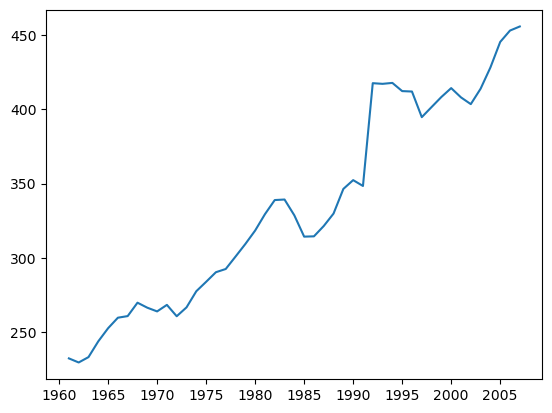

In [10]:
plt.plot(data);

In [5]:
x = np.array(range(1, len(data)+1))
y = data.values

In [6]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     781.2
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.45e-30
Time:                        10:34:47   Log-Likelihood:                -196.70
No. Observations:                  47   AIC:                             397.4
Df Residuals:                      45   BIC:                             401.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8188      4.817     45.221      0.000     208.117     227.520
x1             4.8834      0.175     27.949      0.000       4.531       5.235
==============================================================================
Omnibus:                        3.398   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.340
Skew:                           0.493   Prob(JB):                        0.310
Kurtosis:                       3.472   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
trend = model.predict(x)
detrend = data["value"] - trend   # deterministik trendden arındırılmış data
print(detrend)

date
1961-01-01     9.586776
1962-01-01     1.950648
1963-01-01     0.676935
1964-01-01     6.411291
1965-01-01    10.367132
1966-01-01    12.558195
1967-01-01     8.764325
1968-01-01    12.898125
1969-01-01     4.645624
1970-01-01    -2.734995
1971-01-01    -3.228911
1972-01-01   -15.756969
1973-01-01   -14.663497
1974-01-01    -8.670530
1975-01-01    -7.235654
1976-01-01    -5.644063
1977-01-01    -8.362284
1978-01-01    -4.889180
1979-01-01    -1.316608
1980-01-01     2.844424
1981-01-01     9.002342
1982-01-01    13.630558
1983-01-01     9.107295
1984-01-01    -6.419591
1985-01-01   -25.648229
1986-01-01   -30.327311
1987-01-01   -28.256618
1988-01-01   -24.764496
1989-01-01   -13.052015
1990-01-01   -12.022689
1991-01-01   -20.833448
1992-01-01    43.475568
1993-01-01    38.152824
1994-01-01    33.895322
1995-01-01    23.496375
1996-01-01    18.325897
1997-01-01    -3.807237
1998-01-01    -1.888433
1999-01-01    -0.000627
2000-01-01     1.088314
2001-01-01   -10.039900
2002-01-01 

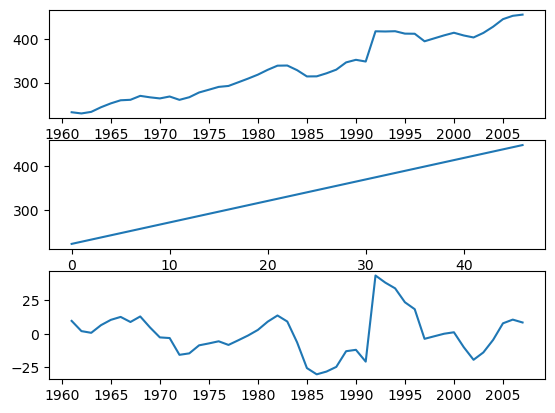

In [18]:
fig, ax = plt.subplots(3,1)
ax[0].plot(data)
ax[1].plot(trend)
ax[2].plot(detrend)
plt.show();

In [22]:
adf = ADF(detrend, trend = "ct", method = "aic")
adf

Test Statistic,-2.689
P-value,0.241
Lags,0


In [23]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.697
Date:                Thu, 18 Jan 2024   Prob (F-statistic):             0.0330
Time:                        10:42:09   Log-Likelihood:                -176.43
No. Observations:                  46   AIC:                             358.9
Df Residuals:                      43   BIC:                             364.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.2869      0.107     -2.689      0.010      -0.502      -0.072
const         -1.1393      3.475     -0.328      0.745      -8.147       5.869
trend          0.0452      0.129      0.351      0.728      -0.215       0.305
==============================================================================
Omnibus:                       52.907   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.322
Skew:                           2.672   Prob(JB):                     2.37e-86
Kurtosis:                      16.311   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
adf = ADF(detrend, trend = "c", method = "aic")
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.419
Date:                Thu, 18 Jan 2024   Prob (F-statistic):            0.00922
Time:                        10:42:52   Log-Likelihood:                -176.50
No. Observations:                  46   AIC:                             357.0
Df Residuals:                      44   BIC:                             360.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.2877      0.106     -2.724      0.009      -0.500      -0.075
const         -0.0783      1.692     -0.046      0.963      -3.489       3.332
==============================================================================
Omnibus:                       53.767   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.620
Skew:                           2.726   Prob(JB):                     1.86e-89
Kurtosis:                      16.545   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
adf

Test Statistic,-2.724
P-value,0.070
Lags,0


In [26]:
kpss = KPSS(detrend, trend = "c")
kpss

Test Statistic,0.067
P-value,0.772
Lags,3


In [28]:
detrend2 = signal.detrend(data["value"])

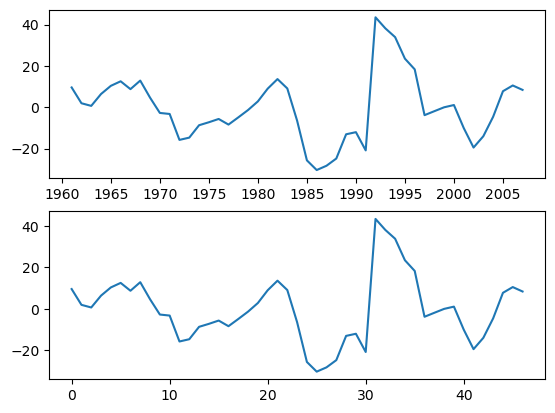

In [29]:
fig, ax = plt.subplots(2,1)
ax[0].plot(detrend)
ax[1].plot(detrend2)
plt.show();

In [31]:
hp = hpfilter(data)
print(hp)

(date
1961-01-01     2.237423
1962-01-01    -4.559661
1963-01-01    -4.995730
1964-01-01     1.576324
1965-01-01     6.374489
1966-01-01     9.416092
1967-01-01     6.480581
1968-01-01    11.474280
1969-01-01     4.072885
1970-01-01    -2.482921
1971-01-01    -2.198367
1972-01-01   -14.012792
1973-01-01   -12.287649
1974-01-01    -5.753334
1975-01-01    -3.868119
1976-01-01    -1.914286
1977-01-01    -4.353035
1978-01-01    -0.676700
1979-01-01     3.032106
1980-01-01     7.272045
1981-01-01    13.459315
1982-01-01    18.070560
1983-01-01    13.478817
1984-01-01    -2.184532
1985-01-01   -21.642521
1986-01-01   -26.667375
1987-01-01   -25.068888
1988-01-01   -22.168745
1989-01-01   -11.145691
1990-01-01   -10.867061
1991-01-01   -20.446636
1992-01-01    43.125383
1993-01-01    37.160178
1994-01-01    32.390517
1995-01-01    21.622253
1996-01-01    16.217594
1997-01-01    -6.035802
1998-01-01    -4.154696
1999-01-01    -2.249604
2000-01-01    -1.113381
2001-01-01   -12.187894
2002-01-01

In [32]:
cy, trend = hpfilter(data)
detrend3 = data["value"] -  trend

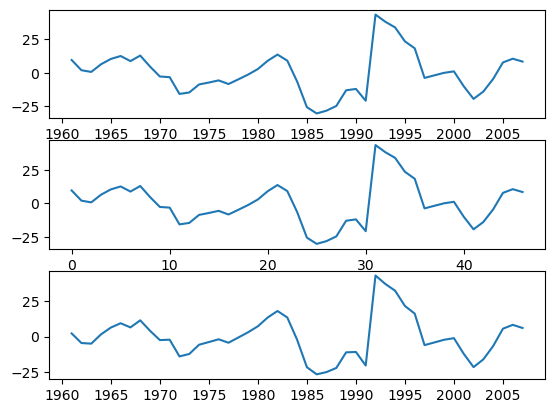

In [33]:
fig, ax = plt.subplots(3,1)
ax[0].plot(detrend)
ax[1].plot(detrend2)
ax[2].plot(detrend3)
plt.show();